# 準備資料

In [ ]:
!gdown --id 1-M8SaDoY5ZxVuZED_ONfPwc_a3t_zXh5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-M8SaDoY5ZxVuZED_ONfPwc_a3t_zXh5
To: /content/MNIST.zip
100% 16.0M/16.0M [00:00<00:00, 40.8MB/s]


In [ ]:
!unzip MNIST.zip

Archive:  MNIST.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
!ls

mnist_test.csv	mnist_train.csv  MNIST.zip  sample_data


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

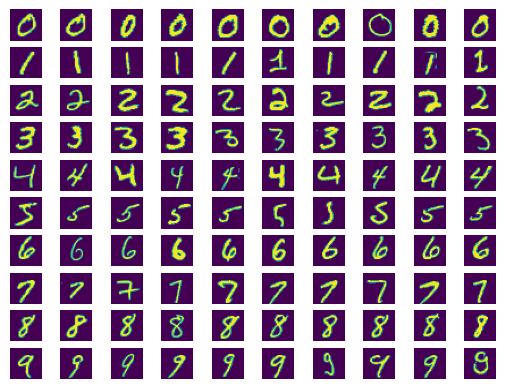

In [ ]:
def show_images(df, label_col, num_images):

    # 清空暫存
    plt.clf()

    # 讓圖片照順序
    labels = sorted(df[label_col].unique())
    
    # 建立 subplot
    f, axarr = plt.subplots(len(labels), num_images)

    for row, label in enumerate(labels):
        df_sub = df[df[label_col] == label]
        X = df_sub.drop(label_col, axis=1)
        for col in range(0, num_images): 
            mat_data = X.iloc[col].values.reshape(28,28)  #reshape images
            axarr[row,col].imshow(mat_data) #plot the data
            axarr[row,col].axis('off')

show_images(train, 'label', 10)

# PCA

In [ ]:
X = train.drop('label', axis=1).values
y = train['label'].values

## 先觀察前 10 個的貢獻度

In [ ]:
pca = PCA(n_components=10, random_state=0)
X_pca_10 = pca.fit(X).transform(X)

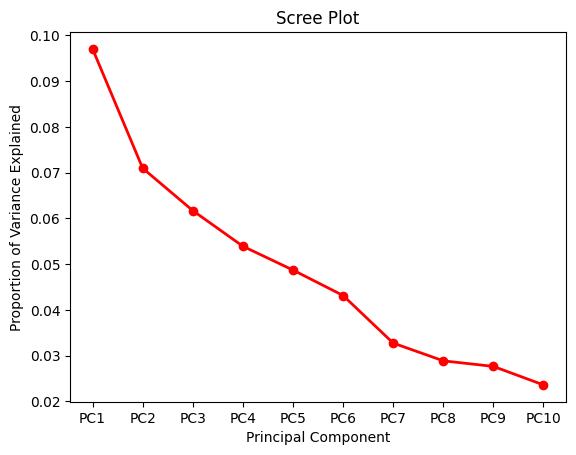

In [ ]:
PC_values = [f'PC{i}'for i in (np.arange(pca.n_components_) + 1).astype(str)]
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

## 需要注意 PCA 的結果是固定的，不用再重新 fit 

In [ ]:
pd.DataFrame(X_pca_10)

,0,1,2,3,4,5,6,7,8,9
0,123.932593,-312.674259,-24.513772,-555.757311,-27.298887,-232.471331,234.018005,159.834938,-363.506685,197.696813
1,1011.718375,-294.857043,596.339480,-460.766251,-827.274918,-181.951550,-45.023258,-104.959788,40.445394,151.039531
2,-51.849606,392.173169,-188.509488,521.012049,-306.680587,-1.830585,-859.065025,368.622046,-114.520177,-178.330206
3,-799.127031,-607.197201,273.651411,105.878687,-1.854637,699.657520,-473.684478,-67.295921,302.747986,10.600452
4,-382.754941,730.542871,16.353833,-241.697250,98.161802,43.231378,-91.677531,-405.535350,225.524231,104.414490
...,...,...,...,...,...,...,...,...,...,...
59995,-99.621762,-293.475566,135.940226,-347.124050,304.275492,236.995399,-498.559723,-237.608833,-494.934504,320.220388
59996,152.757806,-687.899699,-88.932378,-650.013444,198.409353,184.774328,-487.188474,505.347154,-668.890333,27.918823
59997,-178.053447,160.078226,-257.612911,-714.649966,-210.314974,-462.458756,-464.546000,-184.805602,-87.499299,268.245874
59998,130.606068,-5.591941,513.858382,342.703231,-521.164424,-540.557392,-107.404133,140.713899,-16.545634,-93.443628


In [ ]:
pca_test = PCA(n_components=2, random_state=0)
X_pca_test = pca_test.fit_transform(X)
pd.DataFrame(X_pca_test)

,0,1
0,123.927999,-312.670779
1,1011.720562,-294.835325
2,-51.852594,392.167907
3,-799.126365,-607.176613
4,-382.752613,730.531346
...,...,...
59995,-99.622519,-293.505147
59996,152.754769,-687.916951
59997,-178.053575,160.072952
59998,130.608651,-5.592387


## 我們可以直接透過對應位置取 PC1、PC2 ...

In [ ]:
# use PCA to reduce dimension from 64 to 2 (PC!、PC2)
X_pca_2d = X_pca_10[:, :2]
print('Dimensions after PCA-2D:', X_pca_2d.shape)

Dimensions after PCA-2D: (60000, 2)


In [ ]:
# use PCA to reduce dimension from 64 to 3 (PC!、PC2、PC3)
X_pca_3d = X_pca_10[:, :3]
print('Dimensions after PCA-3D:', X_pca_3d.shape)

Dimensions after PCA-3D: (60000, 3)


# TSNE

tsne 比較耗效能，colab 上提供的 cpu 運算資源有限，這邊先抽樣 500 筆代表

In [ ]:
sample500 = train.sample(1000)
sample500

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
33878,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31538,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20970,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48646,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29369,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33974,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
s_X = sample500.drop('label', axis=1).values
s_y = sample500['label'].values

In [ ]:
# use tSNE to reduce dimension from 64 to 2
tsne = make_pipeline(StandardScaler(), TSNE(n_components=2, init='pca', random_state=0))
X_tsne_2d = tsne.fit_transform(s_X, s_y)
print('Dimensions after tSNE-2D:', X_tsne_2d.shape)

Dimensions after tSNE-2D: (1000, 2)


In [ ]:
# use tSNE to reduce dimension from 64 to 3
tsne = make_pipeline(StandardScaler(), TSNE(n_components=3, init='pca', random_state=0))
X_tsne_3d = tsne.fit_transform(s_X, s_y)
print('Dimensions after tSNE-3D:', X_tsne_3d.shape)

Dimensions after tSNE-3D: (1000, 3)


## 視覺化

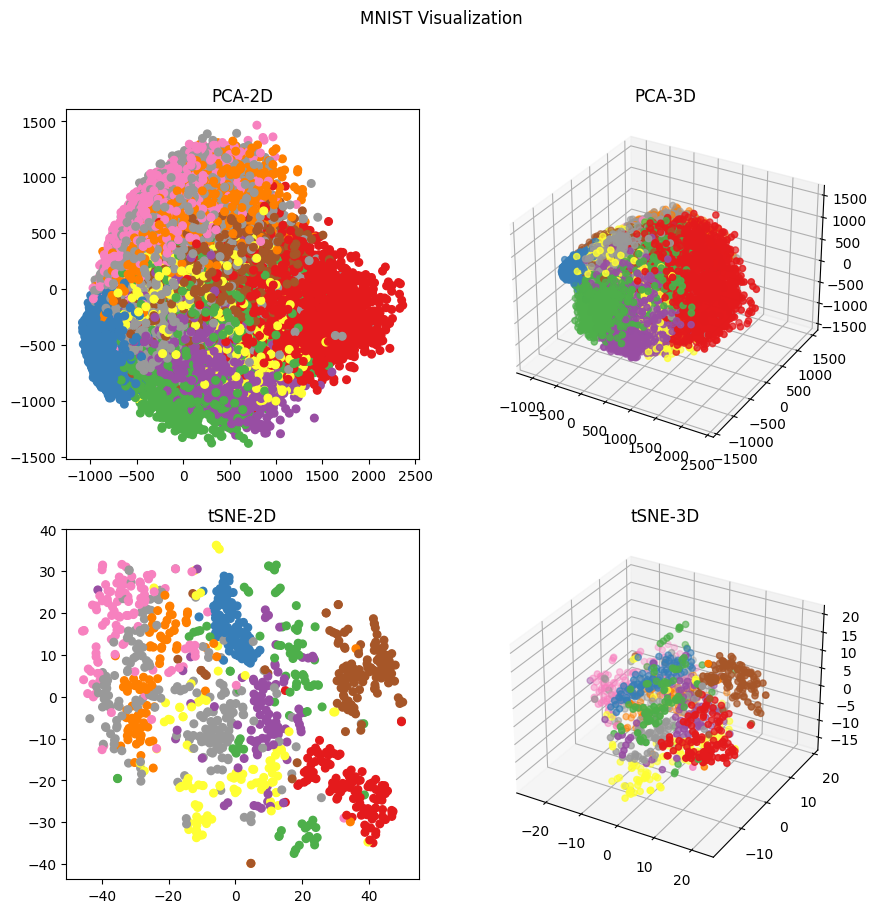

In [ ]:
# plot the points projected with PCA and tSNE
fig = plt.figure(figsize=(10,10))
fig.suptitle('MNIST Visualization')

ax = fig.add_subplot(221)
ax.title.set_text('PCA-2D')
ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, s=30, cmap='Set1')

ax = fig.add_subplot(222, projection='3d')
ax.title.set_text('PCA-3D')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Set1')

ax = fig.add_subplot(223)
ax.title.set_text('tSNE-2D')
ax.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=s_y, s=30, cmap='Set1')

ax = fig.add_subplot(224, projection='3d')
ax.title.set_text('tSNE-3D')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=s_y, cmap='Set1')

plt.show()